In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_excel('messidor_features.train.xlsx')
df_test = pd.read_excel('messidor_features.test.xlsx')

In [3]:
train = df_train
test = df_test

In [4]:
train.shape

(691, 20)

In [5]:
test.shape

(460, 20)

In [6]:
train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,class
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000
mean,0.997106,0.918958,38.848046,37.327062,35.548480,32.693198,29.091172,21.455861,61.401189,22.512123,8.259997,1.735647,0.512054,0.197704,0.085826,0.039275,0.522887,0.108830,0.33864,0.513748
std,0.053760,0.273097,25.810711,24.111459,22.726066,21.023484,19.334705,15.022563,55.799054,20.863280,11.096879,3.461745,1.765507,0.794491,0.381808,0.189818,0.027263,0.018162,0.47359,0.500173
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435035,0.071071,0.00000,0.000000
25%,1.000000,1.000000,17.000000,16.000000,16.000000,14.000000,12.000000,9.000000,20.572379,7.898627,1.188308,0.081471,0.000000,0.000000,0.000000,0.000000,0.503062,0.096154,0.00000,0.000000
50%,1.000000,1.000000,36.000000,35.000000,33.000000,30.000000,26.000000,19.000000,43.875057,16.899024,4.385993,0.468778,0.022462,0.002013,0.000000,0.000000,0.522802,0.106655,0.00000,1.000000
75%,1.000000,1.000000,56.000000,54.000000,51.000000,48.500000,43.000000,32.500000,82.226241,31.324945,11.262884,1.854973,0.196650,0.037103,0.004897,0.003898,0.542711,0.120479,1.00000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,84.000000,71.000000,403.939108,167.131427,106.070092,33.298200,19.666215,9.182962,5.228413,3.086753,0.592217,0.219199,1.00000,1.000000


In [7]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

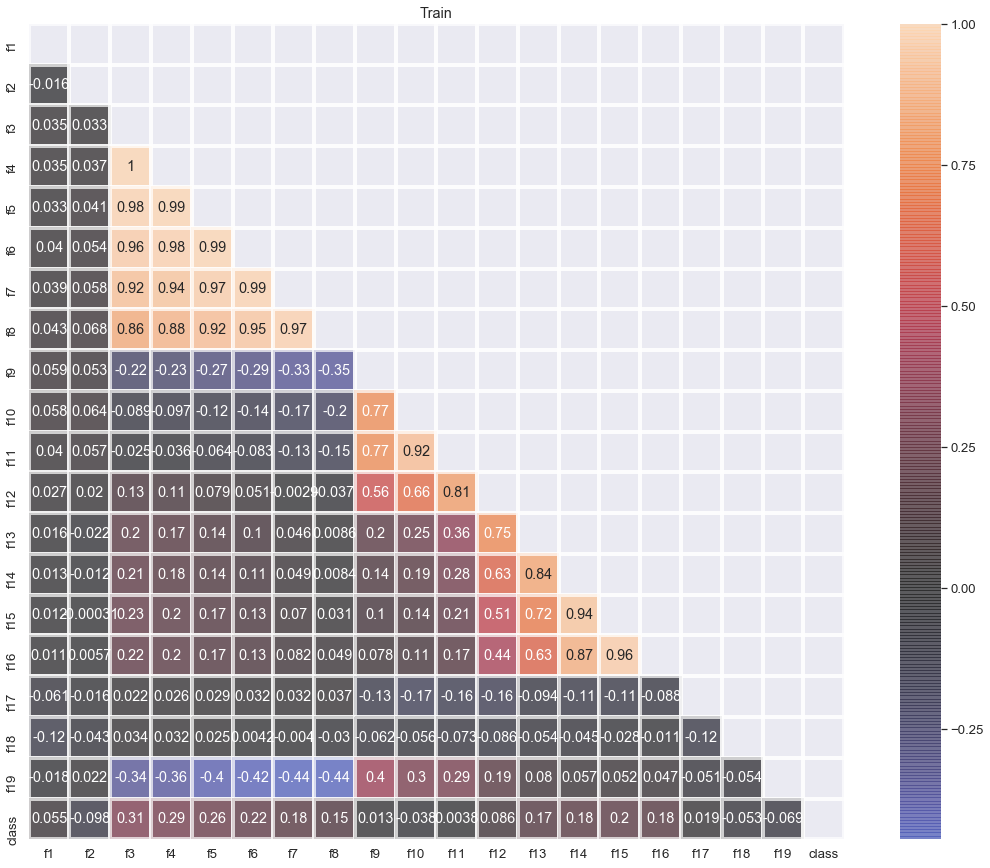

In [8]:
plot_df(train, 'Train')

In [9]:
print(train.columns)

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'class'],
      dtype='object')


In [10]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

2


In [13]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [14]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [15]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [16]:
tr_ans

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [17]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [19]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [20]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [21]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,16]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [22]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
691/691 [==============================] - 2s 3ms/sample - loss: 0.9908 - acc: 0.5499
Epoch 2/64
691/691 [==============================] - 0s 307us/sample - loss: 0.9577 - acc: 0.5818
Epoch 3/64
691/691 [==============================] - 0s 292us/sample - loss: 0.9021 - acc: 0.6078
Epoch 4/64
691/691 [==============================] - 0s 294us/sample - loss: 0.9063 - acc: 0.6006
Epoch 5/64
691/691 [==============================] - 0s 289us/sample - loss: 0.8704 - acc: 0.6411
Epoch 6/64
691/691 [==============================] - 0s 286us/sample - loss: 0.8375 - acc: 0.6889
Epoch 7/64
691/691 [==============================] - 0s 294us/sample - loss: 0.8663 - acc: 0.6614
Epoch 8/64
691/691 [==============================] - 0s 289us/sample - lo

In [25]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
691/691 [==============================] - 4s 6ms/sample - loss: 1.7935 - acc: 0.5499
Epoch 2/64
691/691 [==============================] - 0s 438us/sample - loss: 1.7297 - acc: 0.5745
Epoch 3/64
691/691 [==============================] - 0s 447us/sample - loss: 1.7084 - acc: 0.6020
Epoch 4/64
691/691 [==============================] - 0s 505us/sample - loss: 1.7280 - acc: 0.5253
Epoch 5/64
691/691 [==============================] - 0s 519us/sample - loss: 1.6754 - acc: 0.6035
Epoch 6/64
691/691 [==============================] - 0s 499us/sample - loss: 1.6762 - acc: 0.5861
Epoch 7/64
691/691 [==============================] - 0s 499us/sample - loss: 1.6616 - acc: 0.6078
Epoch 8/64
691/691 [==============================] - 0s 586us/sample - loss: 1.6209 - acc: 0.6368
Epoch 9/64
691/691 [==============================] - 0s 541us/sample - loss: 1.6119 - acc: 0.6179
Epoch 10/64
691/691 [==============================] - 0s 603us/sample - loss: 1.6178 - acc: 0.6165
Epoch 11/64

In [26]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.722142 using {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.704776 (0.025057) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.722142 (0.006601) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.691751 (0.036770) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.674385 (0.027002) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.710564 (0.023025) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.687410 (0.033221) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.675832 (0.050978) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.613603 (0.079129) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_u

In [27]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.733719 using {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'he_normal', 'neurons': 64}
0.727931 (0.010526) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.713459 (0.012857) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.703329 (0.024396) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.716353 (0.010397) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.713459 (0.019850) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.701881 (0.020580) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.709117 (0.014692) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.730825 (0.025342) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_unif

In [28]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.7130434782608696
Confusion Matrix
[[179  25]
 [107 149]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.88      0.73       204
         1.0       0.86      0.58      0.69       256

   micro avg       0.71      0.71      0.71       460
   macro avg       0.74      0.73      0.71       460
weighted avg       0.75      0.71      0.71       460



In [29]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.6978260869565217
Confusion Matrix
[[176  28]
 [111 145]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.72       204
         1.0       0.84      0.57      0.68       256

   micro avg       0.70      0.70      0.70       460
   macro avg       0.73      0.71      0.70       460
weighted avg       0.74      0.70      0.69       460



In [30]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)